# INITIAL IMPORTS

In [1]:
# Basics
import os
import pandas as pd

# PyViz
import seaborn as sns
import matplotlib.pyplot as plt

# Word Clouds
from wordcloud import WordCloud
import re

# Others
import time
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Variables
nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

# READ DATA

In [3]:
# reading the dataset from step 3
personality_data = pd.read_csv("/Users/devinaamangal/Project-2/Final_ipynb/Resources/combined_df.csv")
personality_data.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,...,sentiment,is_Extrovert,is_Sensing,is_Thinking,is_Judging,text,Compound,Negative,Neutral,Positive
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,...,0.166656,0,0,0,1,moment sportscenter top ten play prank life ch...,0.9924,0.132,0.597,0.271
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,...,0.104312,1,0,1,0,finding lack post alarming sex boring position...,0.9987,0.119,0.598,0.284
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,...,0.145745,0,0,1,0,good one course say know blessing curse absolu...,0.9985,0.116,0.581,0.303
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,...,0.131263,0,0,1,1,dear enjoyed conversation day esoteric gabbing...,0.9985,0.087,0.661,0.252
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,...,0.075231,1,0,1,1,fired another silly misconception approaching ...,0.9930,0.186,0.538,0.276


### Word Clouds

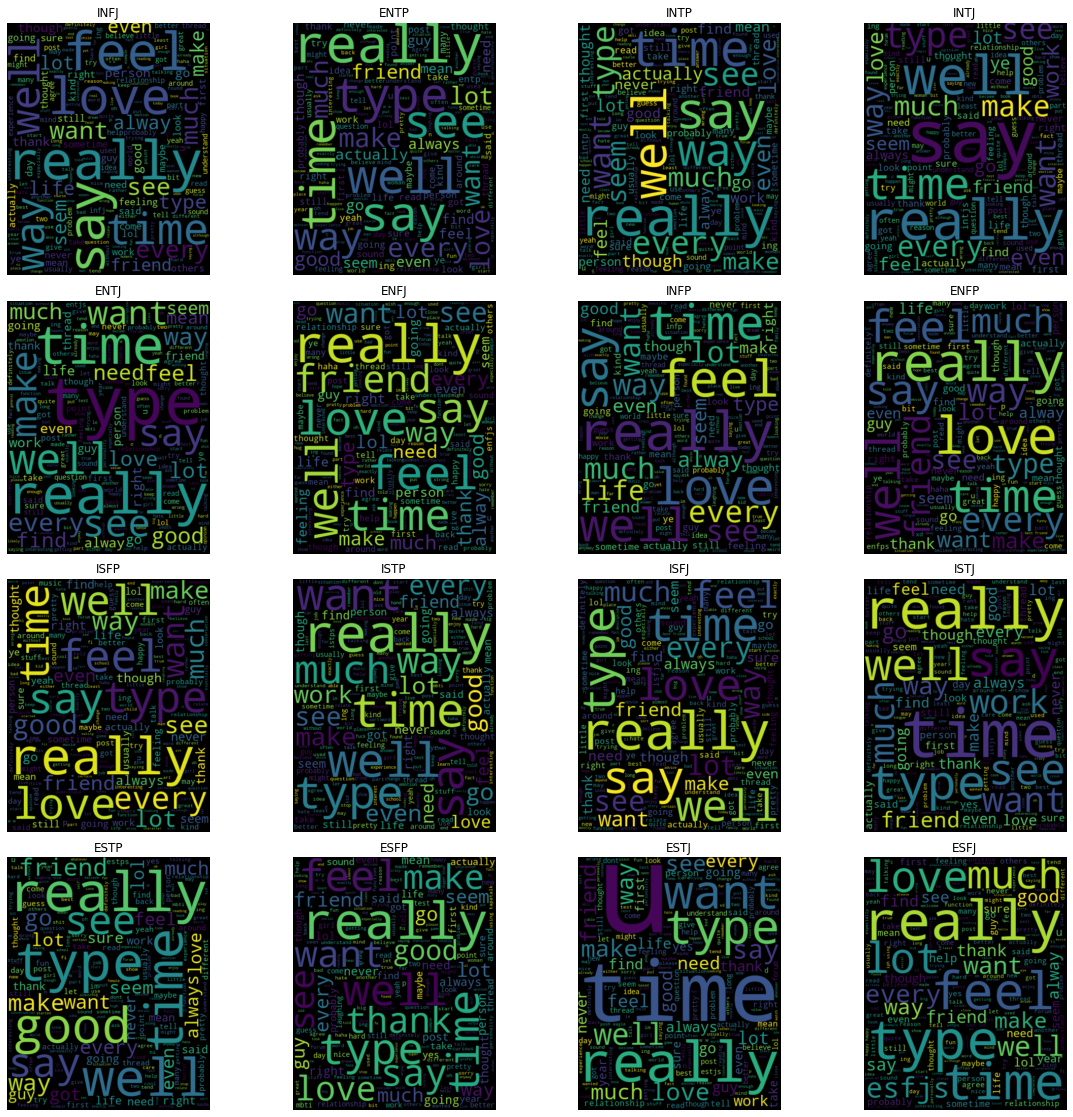

In [4]:
# creating word clouds for each of the 16 personality types

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(people)|(think)|(know)|(thing)|(one)", "", user_posts,)
            for user_posts in personality_data[personality_data["type"] == mbti_type][
                "text"
            ]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)

### COUNTS

#### Word Count by Type

<AxesSubplot:xlabel='words_per_comment', ylabel='type'>

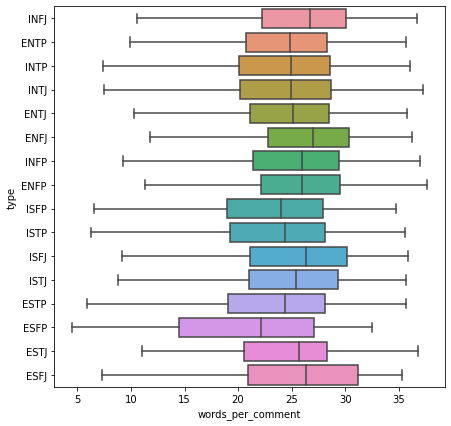

In [5]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="words_per_comment", data=personality_data, showfliers=False)

#### Compound Sentiment Score by Type

<AxesSubplot:xlabel='Compound', ylabel='type'>

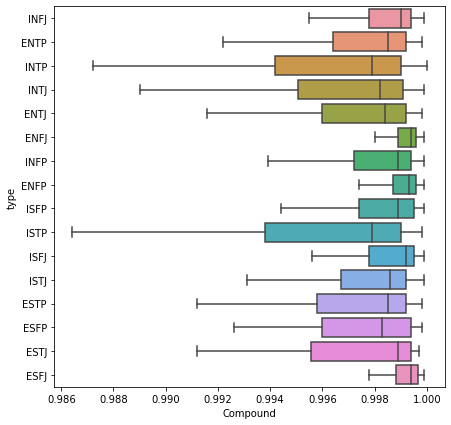

In [6]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="Compound", data=personality_data, showfliers=False)

#### Positive Sentiment Score by Type

<AxesSubplot:xlabel='Positive', ylabel='type'>

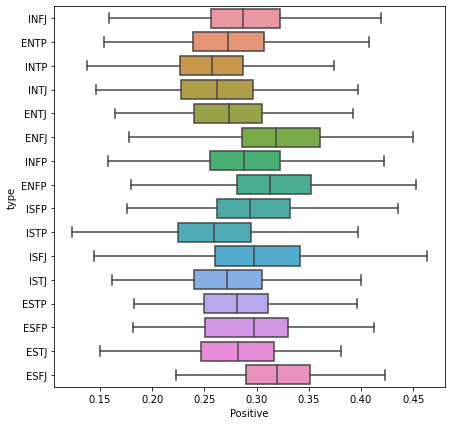

In [7]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="Positive", data=personality_data, showfliers=False)

#### Negative Sentiment Score by Type

<AxesSubplot:xlabel='Negative', ylabel='type'>

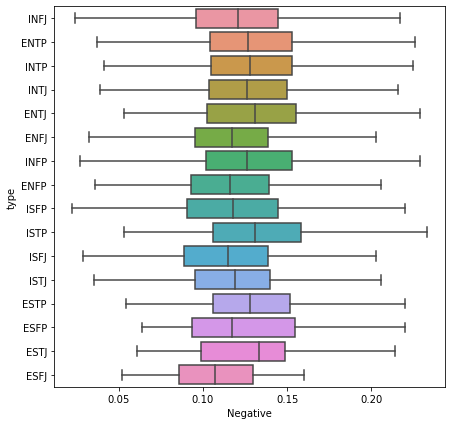

In [8]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="Negative", data=personality_data, showfliers=False)

#### Neutral Sentiment Score by Type

<AxesSubplot:xlabel='Neutral', ylabel='type'>

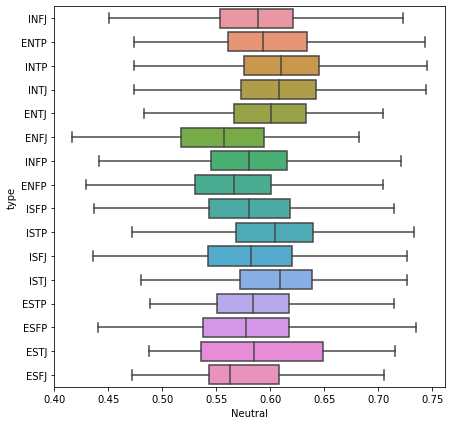

In [9]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="Neutral", data=personality_data, showfliers=False)

#### Question Marks by Type

<AxesSubplot:xlabel='qm_per_comment', ylabel='type'>

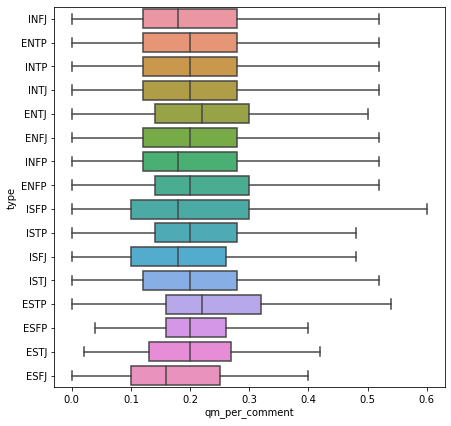

In [11]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="qm_per_comment", data=personality_data, showfliers=False)

#### Exclamation by Type

<AxesSubplot:xlabel='excl_per_comment', ylabel='type'>

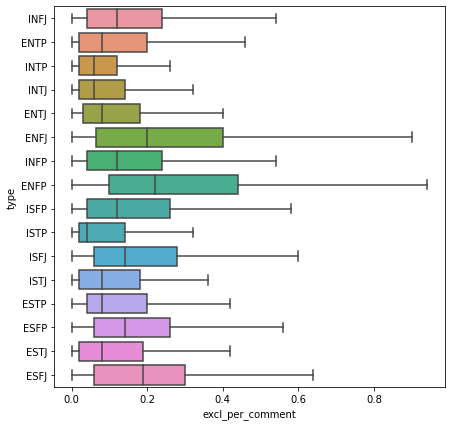

In [12]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="excl_per_comment", data=personality_data, showfliers=False)

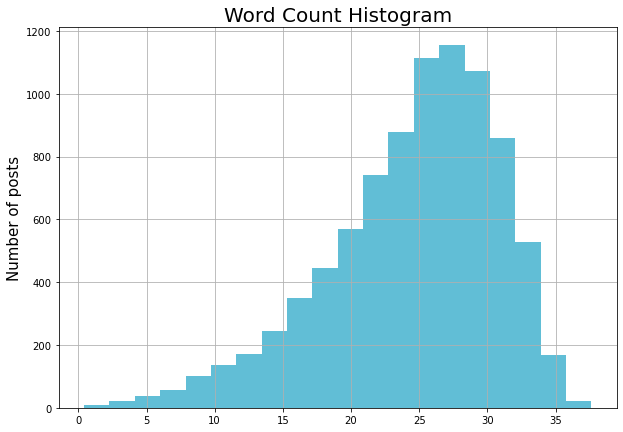

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["words_per_comment"].hist(bins=20, color=nt)
plt.show()

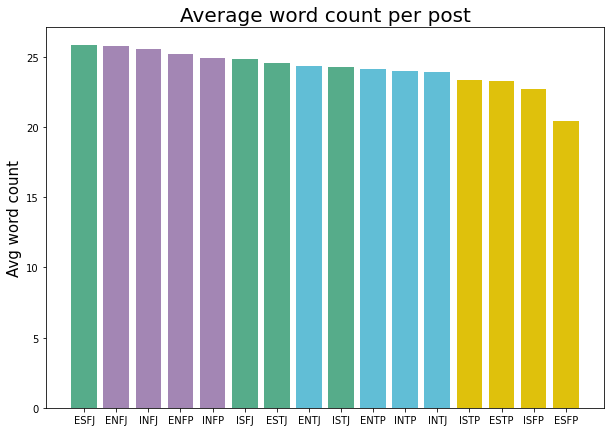

In [14]:
avg_words_type = (
    personality_data.groupby("type")
    .agg({"words_per_comment": "mean"})
    .sort_values("words_per_comment", ascending=False)
)
colors = {x: colors_d[x] for x in avg_words_type.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index, avg_words_type["words_per_comment"], color=list(colors.values()))
plt.show()